In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [12]:
import joblib


Step 1: Data Loading and Exploration

In [15]:
import pandas as pd

# Download Titanic dataset directly from the internet
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

print("Shape:", df.shape)
df.head()

Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

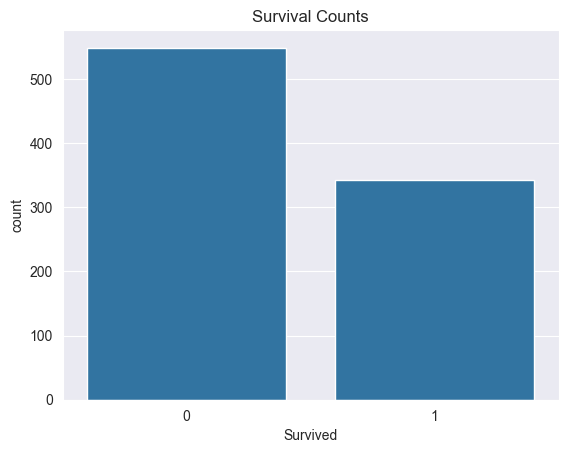

In [17]:
print(df.info())
print(df.isnull().sum())
sns.countplot(x='Survived', data=df)
plt.title('Survival Counts')
plt.show()

Step 2: Data Preprocessing & Feature Engineering

In [20]:
import pandas as pd

# Load Titanic dataset (works instantly)
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

print("Original shape:", df.shape)

# ==================== Feature Engineering ====================
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop irrelevant columns
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# One-hot encoding (this line was broken before — now fixed!)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# ==================== Final Result ====================
print("\nAfter preprocessing:")
print("New shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()

Original shape: (891, 12)

After preprocessing:
New shape: (891, 11)

Columns: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S']


C:\Users\Dell\AppData\Local\Temp\ipykernel_20344\3661781133.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20344\3661781133.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,2,0,True,False,True
1,1,1,38.0,1,0,71.2833,2,0,False,False,False
2,1,3,26.0,0,0,7.9250,1,1,False,False,True
3,1,1,35.0,1,0,53.1000,2,0,False,False,True
4,0,3,35.0,0,0,8.0500,1,1,True,False,True


Step 3: Splitting and Scaling Data

In [22]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
num_cols = ['Age','Fare','FamilySize']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Step 4: Model Training and Evaluation

In [24]:
models = {
'LogisticRegression': LogisticRegression(max_iter=500),
'DecisionTree': DecisionTreeClassifier(random_state=42),
'RandomForest': RandomForestClassifier(random_state=42)
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
results[name] = acc
print(name)
print('Accuracy:', acc)
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

RandomForest
Accuracy: 0.8156424581005587
[[96 14]
 [19 50]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



Step 5: Hyperparameter Tuning (Random Forest)

In [25]:
param_grid = {
'n_estimators': [50, 100],
'max_depth': [None, 5, 10]
}
rf = RandomForestClassifier(random_state=42)
gs = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)
print('Best Parameters:', gs.best_params_)

Best Parameters: {'max_depth': 10, 'n_estimators': 50}


Step 6: Model Persistence

In [26]:
joblib.dump(gs.best_estimator_, 'titanic_best_model.joblib')
print('Model saved successfully!')

Model saved successfully!
